In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
font = {'family': 'IPAexGothic'}
matplotlib.rc('font', **font)
import matplotlib.pyplot as plt
sns.set_context("notebook")
plt.figure(figsize=(40, 20))

<Figure size 2880x1440 with 0 Axes>

<Figure size 2880x1440 with 0 Axes>

In [44]:
# load data
events = pd.read_csv("../input/all/events.tsv", sep="\t")
log = pd.read_csv("../input/all/log.tsv", sep="\t")
users = pd.read_csv("../input/all/users.tsv", sep="\t")

In [4]:
events.head()

,event_id,female_age_lower,female_age_upper,male_age_lower,male_age_upper,event_start_at,prefecture,first_published_at,female_price,male_price,interest
0,1,20,99.0,25,44.0,2015-03-08 18:00:00,宮城県,NaN,1500.0,5000.0,NaN
1,2,30,99.0,30,49.0,2015-03-01 15:00:00,富山県,NaN,1000.0,6500.0,NaN
2,3,22,99.0,24,39.0,2015-03-07 19:00:00,富山県,NaN,1000.0,6000.0,NaN
3,4,20,99.0,25,44.0,2015-03-08 18:00:00,新潟県,NaN,1000.0,6000.0,NaN
4,5,20,99.0,20,39.0,2015-03-14 19:00:00,新潟県,NaN,1000.0,6000.0,NaN


In [5]:
log.head()

,user_id,event_id,time_stamp,action_type,num_of_people,payment_method,total_price
0,1,6261,2015-03-19 09:15:50,3,1.0,クレカ,4000.0
1,1,127600,2017-06-05 12:33:17,1,NaN,NaN,NaN
2,1,127600,2017-06-05 12:37:09,1,NaN,NaN,NaN
3,1,125296,2017-06-06 14:01:27,1,NaN,NaN,NaN
4,1,125128,2017-06-06 14:03:57,1,NaN,NaN,NaN


In [6]:
users.head()

,user_id,age,gender,prefecture,created_on
0,1,34,女性,静岡県,2012-06-26
1,2,31,男性,鳥取県,2012-07-12
2,3,32,男性,東京都,2012-07-15
3,4,30,男性,東京都,2012-07-17
4,5,29,女性,埼玉県,2012-07-17


In [7]:
purchased_log = log[log["action_type"] == 3]
purchased_log.shape

(254055, 7)

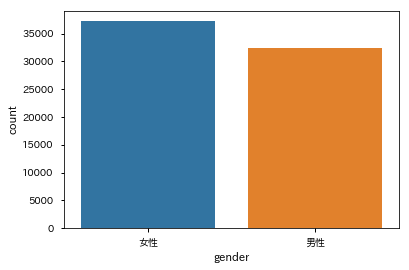

In [12]:
sns.countplot(users.gender)

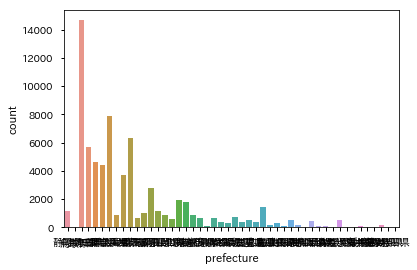

In [16]:
# 都道府県別UU
sns.countplot(users.prefecture)

/home/t-maehara/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


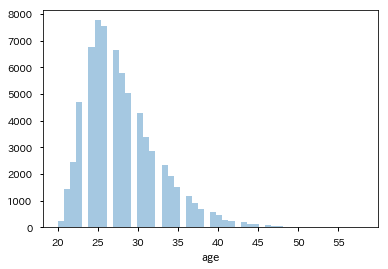

In [18]:
# 年齢
sns.distplot(users.age, kde=False)

In [20]:
users.isnull().sum()

user_id       0
age           0
gender        0
prefecture    0
created_on    0
dtype: int64

In [21]:
events.isnull().sum()

event_id                   0
female_age_lower           0
female_age_upper         610
male_age_lower             0
male_age_upper           350
event_start_at             0
prefecture                 0
first_published_at     71847
female_price             992
male_price               704
interest              141309
dtype: int64

In [24]:
log.isnull().sum()

user_id                 0
event_id                0
time_stamp              0
action_type             0
num_of_people     1198034
payment_method    1198034
total_price       1198034
dtype: int64

/home/t-maehara/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


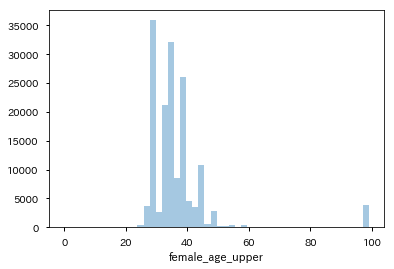

In [29]:
sns.distplot(events.female_age_upper, kde=False)

/home/t-maehara/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


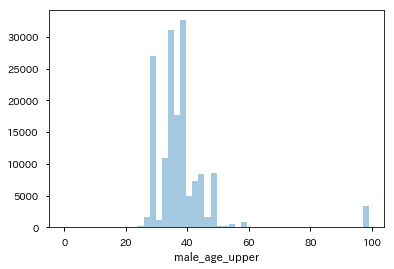

In [30]:
sns.distplot(events.male_age_upper, kde=False)

/home/t-maehara/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


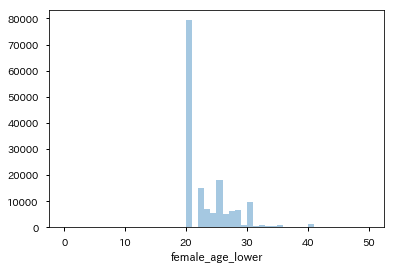

In [31]:
sns.distplot(events.female_age_lower, kde=False)

/home/t-maehara/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


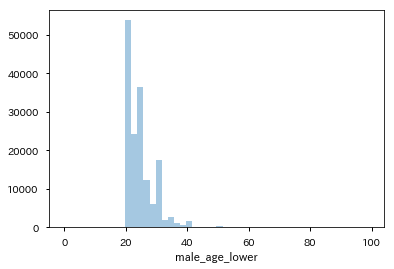

In [32]:
sns.distplot(events.male_age_lower, kde=False)

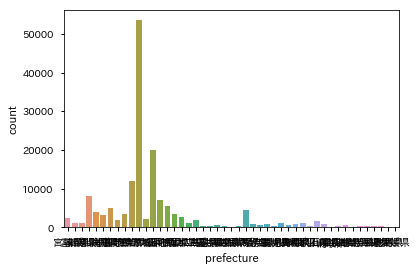

In [33]:
sns.countplot(events.prefecture)

In [77]:
events.male_price.describe()

count    157688.000000
mean       6136.072498
std        1539.333369
min           0.000000
25%        5000.000000
50%        6500.000000
75%        7000.000000
max      106000.000000
Name: male_price, dtype: float64

In [97]:
events.describe()

,event_id,female_age_lower,female_age_upper,male_age_lower,male_age_upper,female_price,male_price
count,158392.000000,158392.000000,157782.000000,158392.000000,158042.000000,1.574000e+05,157688.000000
mean,79196.500000,22.989185,36.434796,24.283550,37.962909,2.709244e+03,6136.072498
std,45723.976256,3.996035,10.722185,4.502481,10.339826,7.058061e+04,1539.333369
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,39598.750000,20.000000,29.000000,20.000000,33.000000,2.000000e+03,5000.000000
50%,79196.500000,20.000000,35.000000,24.000000,36.000000,2.500000e+03,6500.000000
75%,118794.250000,25.000000,39.000000,26.000000,39.000000,3.000000e+03,7000.000000
max,158392.000000,50.000000,99.000000,99.000000,99.000000,2.800150e+07,106000.000000


In [46]:
all = pd.merge(pd.merge(log, users),events)

In [64]:
# イベントごとの統計値、参加ユーザー数
log.groupby("event_id")["user_id"].count().describe()

count    126121.000000
mean         11.513459
std          17.762360
min           1.000000
25%           2.000000
50%           5.000000
75%          13.000000
max         443.000000
Name: user_id, dtype: float64

In [68]:
# ユーザーごとの参加イベント数
log.groupby("user_id")["event_id"].count().describe()

count    69773.000000
mean        20.811618
std         42.367082
min          1.000000
25%          4.000000
50%         10.000000
75%         23.000000
max       2349.000000
Name: event_id, dtype: float64

In [92]:
tmp = all[all["female_age_upper"].isnull()].groupby("event_id")["age"].max().reset_index()

In [96]:
all["female_price"].median()

2500.0